<img src="https://drive.google.com/uc?id=1-cL5eOpEsbuIEkvwW2KnpXC12-PAbamr" style="Width:1000px">

# Predicting Nepal earthquake damage on buildings using Ensemble methods

In this exercise, you will use `Ensemble` learning to work on earthquakes again. However, this time you will use a different dataset and predict the damage inflicted on buildings in case of a major Earthquakes in Nepal. 

## Scientific Background
Every year The National Earthquake Information Center (NEIC) records an average of 20,000 earthquakes all around to world. This number is fairly large, and implies an average of 50 earthquake occured  each day$^{[1]}$. Of course, the magnitude of most of these Earthquakes is fairly low.

## Data
In 2015 April 25, an intense earthquake occured in Central Nepal at local time of 11:56 a.m. The data used here was collected through surveys by [Kathmandu Living Labs](http://www.kathmandulivinglabs.org/) and the [Central Bureau of Statistics](https://cbs.gov.np/). This data is one of the largest post-disaster dataset ever collected, and it includes a wide range of information.

## Objective
Your goal is to predict the level of damage sustained by different buildings during the 2015 ***Gorkha earthquake*** in Nepal. Your goal, by the end of this notebook, is to obtain **>70% accuracy in your prediction**. 

***<span style="color:teal"> Acknowledgement</span>***:Thanks to Parastoo Salah for assembling an initial version of the dataset used in this notebook!


# Opening the data

Open the data in `earthquake_nepal.csv`,  separate the target (`damage_grade`) and the features, and do a train_test_split with 80% in the `train_set` . <br>
Convert your `y_train` and `y_test` to categorical data using a `label_encoder`.


In [ ]:
from nbta.utils import download_data
download_data(id='1a4du6aGHJI2bM6UetT9N2Snqe1d3oEbR')

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset
data = pd.read_csv('../../07-Ensemble-Methods/02-Earthquake-damage/raw_data/earthquake_nepal.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder

X = data.drop(columns='damage_grade')
y = data.damage_grade

l_enc = LabelEncoder()

y = l_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [5]:
X_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
20082,748399,20,508,10459,2,5,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
11285,790106,26,1216,298,2,5,4,4,t,r,...,0,0,0,0,0,0,0,0,0,0
18448,533012,27,533,6299,3,10,7,7,t,r,...,0,0,0,0,0,0,0,0,0,0
18531,667111,11,938,10992,3,45,8,10,n,r,...,0,0,0,0,0,0,0,0,0,0
7908,561440,17,680,3222,3,10,7,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,786989,4,891,5319,3,995,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
5390,757825,8,600,4356,3,5,12,7,t,r,...,0,0,0,0,0,0,0,0,0,0
860,1023622,17,582,4226,3,30,7,6,n,r,...,0,0,0,0,0,0,0,0,0,0
15795,402501,16,479,11951,2,30,6,4,t,r,...,0,0,0,0,0,0,0,0,0,0


# Ensuring Data Quality
* Check for missing data
* Check what data types are present in your dataset: is it all `numerical`, or do you have `categorical` data?
* Plot a `heatmap` to check for strong co-linearitu


In [6]:
X_train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [7]:
# checking the types of varibles in the dataset(int,float,object)
pd.DataFrame(X_train.dtypes, columns=["Data Type"])

,Data Type
building_id,int64
geo_level_1_id,int64
geo_level_2_id,int64
geo_level_3_id,int64
count_floors_pre_eq,int64
age,int64
area_percentage,int64
height_percentage,int64
land_surface_condition,object
foundation_type,object


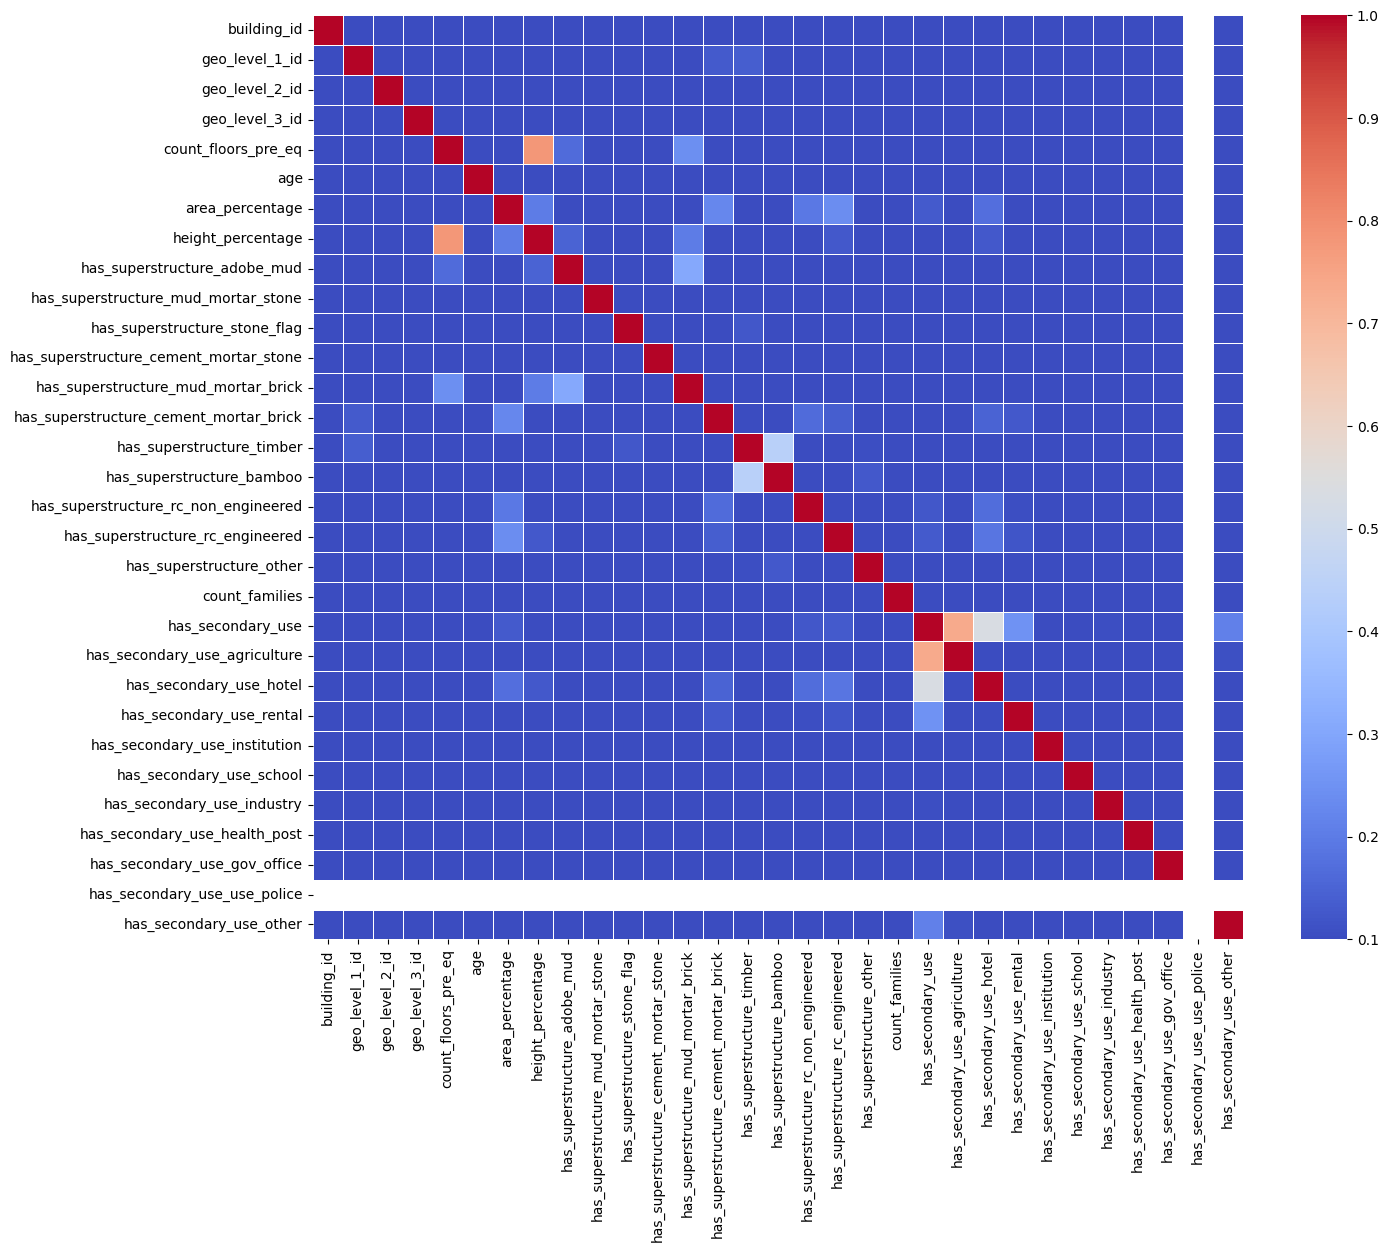

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(15, 12))
data = X_train.select_dtypes(exclude='object').corr()

sns.heatmap(data, annot=None, linewidths=.5, fmt= 'f',cmap='coolwarm',ax=ax, vmin=0.1, vmax=1);

# Data Preprocessing

Because we will be using the data multiple times on different classifier, it will be more convenient today to prepare it once using a `data preprocessing pipeline`, and then simply re-used the already preprocessed data. This will save us a bit of time at training time, and a lot of hassle (our pipelines won't get overly complicated). Of course, the drawback is that we won't be able to consume raw data straight into our model, but we will worry about this in our next exercise.

So, prepare a preprocessing pipeline named `preproc` that will do the following:
* `OneHotEncoding` on any categorical data
* `StandardScaling` of numerical data

Then, fit `preproc` on `X_train`, and go ahead and transform `X_train` and `X_test` (simply save the transformed versions back to the original names).

In [9]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [10]:
cat_pipe = make_column_transformer((OneHotEncoder(),X_train.select_dtypes(exclude=np.number).columns), remainder='drop')
num_pipe = make_column_transformer((StandardScaler(),X_train.select_dtypes(include=np.number).columns), remainder='drop')
preproc = make_union(cat_pipe, num_pipe)
preproc

FeatureUnion(transformer_list=[('columntransformer-1',
                                ColumnTransformer(transformers=[('onehotencoder',
                                                                 OneHotEncoder(),
                                                                 Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object'))])),
                               ('columntransformer-2',
                                ColumnTransformer(transformer...
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object'))]))])

In [11]:
preproc.fit(X_train)

FeatureUnion(transformer_list=[('columntransformer-1',
                                ColumnTransformer(transformers=[('onehotencoder',
                                                                 OneHotEncoder(),
                                                                 Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object'))])),
                               ('columntransformer-2',
                                ColumnTransformer(transformer...
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object'))]))])

In [12]:
X_train = preproc.transform(X_train)
X_test = preproc.transform(X_test)

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult
import scipy

result = ChallengeResult('data_preproc',
                         X_train_shape = X_train.shape,
                         X_test_shape =  X_test.shape,
                         sparsity = scipy.sparse.issparse(X_test)
)

result.write()
print(result.check())

# Dummy modelling

Our first step is to understand what the preformance of a `Dummy Model` looks like. Go ahead and create a `DummyClassifier`, choosing the `strategy` that will give you a similar distribution of prediction than the actual distribution of the class. Then, fit it to `X_train` and `y_train`, and generate an accuracy score (save this into a variable called `dummy_score`.

Is the accuracy of the dummy model any good?

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)

In [14]:
y_pred = dummy.predict(X_test)

In [15]:
dummy_score = accuracy_score(y_test, y_pred)

In [16]:
dummy_score

0.4522256331542594

# Linear Model

Let's see if a linear classifier would beat the dummy model! Using a `LogisticRegression` classifier, do the same process as for the `DummyClassifier` described above, but save the new accuracy score into a variable named `linear_score`.

Does `LogisticRegression` beat your `DummyClassifier`, and does `LogisticRegression` give you the `>70% accuracy` we want?

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=3000).fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

linear_score = accuracy_score(y_test, y_pred)

linear_score

0.5832693783576363

# KNN model

Using a K-nearest neighbour classifier, do the same as above, and save the score as `knn_score`. Is `knn_score` > 70%?

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier().fit(X_train, y_train)

y_pred = knn_class.predict(X_test)

knn_score = accuracy_score(y_test, y_pred)

knn_score

0.5836531082118189

# Linear SVC using the `SGDClassifier` class

Finally, use a `linear SVC` by calling an instance of `SGDClassifier` and setting the paramaters of `loss="hinge"` and `max_iter=3000`. Save the score of this classifier as `sgd_score`. Is `sgd_score` > 70%?

In [19]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', max_iter=3000).fit(X_train, y_train)

y_pred = sgd.predict(X_test)

sgd_score = accuracy_score(y_test, y_pred)

sgd_score

0.5788564850345357

# Decision Trees

Finally, use a `DecisionTreeClassifier` to see how an individual decision tree would perform. Save the score of this classifier as `tree_score`. Is `tree_score` > 70%?

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

tree_score = accuracy_score(y_test, y_pred)

tree_score

0.5963161933998465

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('initial_models_results',
                         dummy_score = dummy_score,
                         linear_score =  linear_score,
                         knn_score =  knn_score,
                         sgd_score =  sgd_score,
                         tree_score =  tree_score
)

result.write()
print(result.check())

# RandomForestClassifier

By now, you have a pretty good feel for what accuracy you can get with a linear model (`LogisticRegression`) and a non-linear model (`KNeighborsClassifier`). Of course, we have not yet tweaked their hyperparameters, but we will leave this for last.

Now is time to see how well a plain-vanilla `RandomForestClassifier` performs on this dataset. Save your `accuracy_score` in a variable called `rf_score`. Is `rf_score` > 70%?

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)

In [22]:
y_pred = rf_model.predict(X_test)

In [23]:
rf_score = accuracy_score(y_test, y_pred)
rf_score

0.6728702993092862

# Boosting our performance with `BaggingClassifiers`

The `RandomForestClassifier` comes close to meeting our required `>70% accuracy` score: it is definitely a better model than any of the previous ones we tried. But `RandomForest` is simply a version of a `Bagging Algorithm`, where multiple `DecisionTreeClassifiers` are trained on different versions of the same dataset (this is where the `bagging` term comes from - as in getting different samples out of the bag). 

Let's try if we can boost the performance of our `KNeighborsClassifier` by bagging it. Create a `BaggingClassifier` (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">sklearn documentation</a>) with a plain vanilla `KNeighborsClassifier` as your base estimator, a total of 15 knn estimators, each trained on a maximum of 50% of the dataset and only 50% of the features. Set the `random_state=42` to ensure you pass the test. See what the performance of this algorithm is, and save your score in a variable called `knn_bag_score`.

**Warning**: KNN will take a long time to come to a prediction, so creating your `y_pred` will be long (but training is fast). Be patient! ☕

In [24]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(estimator=knn_class, n_estimators=15, max_samples=.5, max_features=.5, random_state=42).fit(X_train, y_train)

In [25]:
y_pred = bag.predict(X_test)

In [26]:
knn_bag_score = accuracy_score(y_test, y_pred)
knn_bag_score

0.6402532617037605

<details><summary>💡 Observations</summary><br>
    We can see that the bagged version of the KNN outperforms the single KNN by at least 6-7%! This is pretty impressive. <br>It does not, however, outperform our RandomForest classifier. This is in part because we trained fewer individual predictors: the fact that at inference time KNNs are slow makes them less practical for this purpose than the decision trees.</details>

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('boosting_score',
                         rf_score = rf_score,
                         knn_bag_score =  knn_bag_score
)

result.write()
print(result.check())

# Prediction using heterogenous classifiers

So far, we have used two `Ensemble` classifier: a `RandomForest` and a `Bagged KNN` classifier. You have seen that they both outperformed their non-bagged versions (`DecisionTreeClassifier` and `KNeighborsClassifier`). But what they have in common is that they are composed of a homogeneous ensemble of classifiers (either only `DecisionTrees` or only `KNeighborsClassifier`).

Sometimes, it might be beneficial to use a heterogenous ensemble of classifiers to boost our performance. We can do this via two main classes in `sklearn`: the `VotingClassifier` and the `StackingClassifier`.

## `VotingClassifier`

Let's start with `VotingClassifier` as this is the most straightforward class. All it does is train a list of classifiers, and then agglomerate their results (either the predicted class (**hard voting**) or the predicted probabilities (**soft voting**)).<br>
Create a `VotingClassifier` composed of:
1. One `LogisticRegression` 
3. One `SGDClassifier(loss='hinge', max_iter=3000)`
4. One `KNeighborsClassifier`
5. One `RandomForestClassifier`

Call this classifier `voting_classifier`, and save its performance in a variable called `voting_accuracy`. Do we outperform our `RandomForest` and the `bagged KNNs`?

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

estimators = [('lr', log_reg),('sgd',sgd),  ('knn',knn_class), ('rf', RandomForestClassifier())]

voting_classifier = VotingClassifier(estimators = estimators, voting='hard')


In [28]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=3000)),
                             ('sgd', SGDClassifier(max_iter=3000)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier())])

In [29]:
voting_accuracy = accuracy_score(y_test, voting_classifier.predict(X_test))
voting_accuracy

0.6072524942440521

<details><summary>💡 Observations</summary><br>
    The performance should be in the lower 60%, so not as good as our bagged algorithm. This is because we are not weighting our outputs (see below).</details>

## `StackingClassifier`

The `VotingClassifier` is somewhat limited in that it takes the output of our classifiers, and simply uses this to come up to a classification. You can, of course, also work with the `weights` hyperparameter of this class to give different weights to the output of each individual classifier. In theory, you could tweak those using a `GridSearchCV` or `RandomizedSearchCV`: feel free to try this if you want.

But I think that a better way to go forward is to use a `StackingClassifier`: unlike a `VotingClassifier`, the strategy behind a `StackingClassifier` is to train one final model that uses the output of your stacked models as inputs. In other words, we can train any model we want (even neural networks!) on the output of the different classifiers.

Let's go ahead and do this using the same list of models as above for our `StackingClassifier`, but in addition, using another `LogisticRegression` as our `final_estimator`. Use a `cv=5` to train your `StackingClassifier` (as always, consult the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html">sklearn documentation</a> if you want to learn how to properly use this classifier.

Save your `X_test` accuracy score under a variable named `stacking_accuracy`.

In [30]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators = estimators,final_estimator= LogisticRegression(max_iter=1000), cv=5)

stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(max_iter=3000)),
                               ('sgd', SGDClassifier(max_iter=3000)),
                               ('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(max_iter=1000))

In [31]:
stacking_accuracy = accuracy_score(y_test, stacking_model.predict(X_test))
stacking_accuracy

0.672102839600921

<details><summary>💡 Observations</summary><br>
    This time, we outperform our RandomForestClassifier by about 2%. This is already better, but not yet >70%. Don't worry: we will achieve this in our next exercise.</details>

# Saving `preproc` to reuse it

Well done! You are nearly done. In the next exercise, we will reuse the same dataset, and thus we will need to use the same `preproc` pipeline. We could of course simply rewrite the code, and retrain `preproc`. The pipeline is simple enough that this won't be any trouble.

However, we will use this as an opportunity to learn how to save and open `sklearn` transformers and models to disk. This means you can save an `sklearn` object, and send it to whoever needs to use it.

For this, we will simply use the `joblib` library: <a href="https://scikit-learn.org/stable/model_persistence.html">read to sklearn documentation</a> to know why to use joblib rather than pickle, and how to do this. Then, save your trained transformer direction into the folder of the next exervise (use this path: "../04-XGBoost/preproc.joblib")

In [ ]:
from joblib import dump

dump(preproc, '../04-XGBoost/preproc.joblib')

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('stacking_score',
                         voting_score = voting_accuracy,
                         stacking_score =  stacking_accuracy
)

result.write()
print(result.check())

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.